## Chroma features


The follwing variants of chroma features are available on the ChromaFeatures class:-

    * STFT-based Chroma
    * Contant-Q transform-based Chroma
    * Chroma CENS features
    * Chroma HPCP features
    * Beat-Synchronous Chroma features
    * 2D-Fourier transform magnitude coefficients of chroma

In [15]:
#import ChromaFeatures class
from chroma_features import ChromaFeatures
from chroma_features import display_chroma
import cover_similarity_measures as sims
import matplotlib.pyplot as plt

In [16]:
#replace with the path to your audio file 
audio1_path = "../ChromaFeatures_CoverID/audio/b2c23f7e-bf5c-4328-9c24-752216ac2a41.m4a" 
audio2_path = "../ChromaFeatures_CoverID/audio/f8ea1ce8-32e7-49ca-8d06-dd2e9382acba.mp3"

# Initiate the ChromaFeatures class 
audio1 = ChromaFeatures(audio_file=audio1_path, mono=True, sample_rate=44100) 
audio2 = ChromaFeatures(audio_file=audio2_path, mono=True, sample_rate=44100) 

# if not specified the class is initiated with default params
#chroma = ChromaFeatures(audio_path)

== Audio vector of ../ChromaFeatures_CoverID/audio/b2c23f7e-bf5c-4328-9c24-752216ac2a41.m4a loaded with shape (13803520,) and sample rate 44100 ==
== Audio vector of ../ChromaFeatures_CoverID/audio/f8ea1ce8-32e7-49ca-8d06-dd2e9382acba.mp3 loaded with shape (10099712,) and sample rate 44100 ==


In [17]:
#Now you can access various chroma variant features as a method of chroma object
c_stft_query = audio1.chroma_stft()
c_cqt_query = audio1.chroma_cqt()
# you can pass extra parameters such as hop_size and number of bins etc while computing specific features
c_hpcp_query = audio1.chroma_hpcp(hopSize=2048, numBins=12)

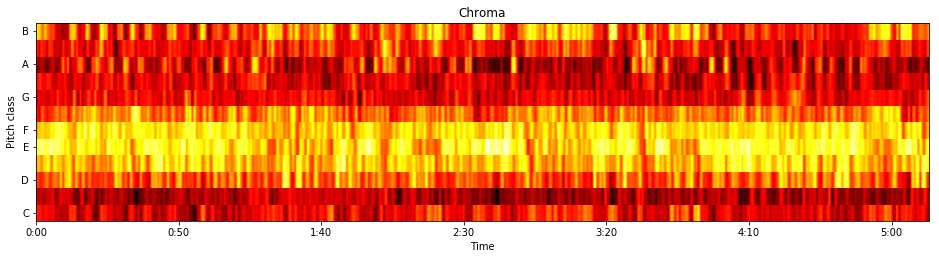

In [32]:
"""
You can plot the chroma vector anytime after the feature computation using 
the display methods available in the chroma object with the available color maps 
in matplotlib
"""
display_chroma(c_cens_query, cmap="hot")

## Cover Song Identification

Now we can compute the cover song similarity measures from the input chroma features of audio1 (query song) and the
audio2 (reference song).

* Compute chroma hpcp features of both query and reference song
* Contstruct a cross recurrent plot from this features
* Compute compute various cover song similarity measures (distances) as mentioned in the following papers
* Following cover song similarity measures are available for the moment:-

    * Qmax cover song similarity
    * Dmax cover song similarity



In [24]:
# compute chroma hpcp features for query song using default params
c_hpcp_query = audio1.chroma_hpcp()

# compute chroma hpcp features for reference song using default params
c_hpcp_reference = audio2.chroma_hpcp()

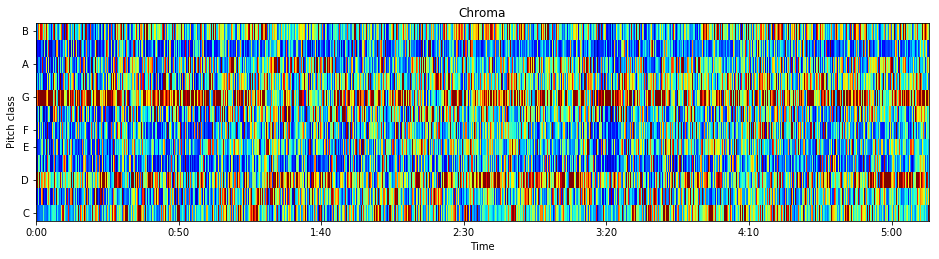

In [23]:
# plotting chroma_hpcp vector with 12 bins of the query song
display_chroma(c_hpcp_query, cmap='jet')

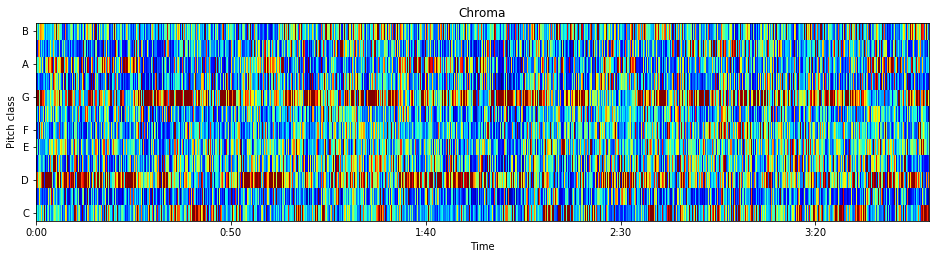

In [26]:
# plotting chroma_hpcp vector with 12 bins of the reference song
display_chroma(c_hpcp_reference, cmap='jet')

In [27]:
# Compute cross recurrent plot from two chroma audio feature vectors as mentioned in [1]
sim_matrix = sims.cross_recurrent_plot(c_hpcp_query, c_hpcp_reference)
sim_matrix


Optimal Transposition Index (OTI) : 11


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

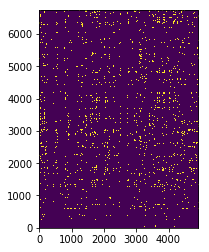

In [28]:
# Plot the cross recurrent plot
plt.imshow(sim_matrix, origin='lower')
plt.show()

In [29]:
#Computing qmax cover song audio similarity measure (distance) as mentioned in [1]
qmax, cost_matrix = sims.qmax_measure(sim_matrix)


CRP with shape : (6732, 4924)


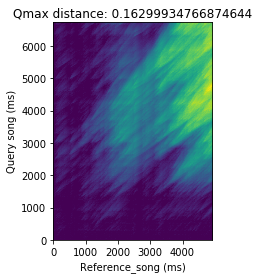

In [31]:
#Plot the qmax scoring matrix
plt.imshow(cost_matrix, origin='lower')
plt.title("Qmax distance: %s" % qmax)
plt.xlabel("Reference_song (ms)")
plt.ylabel("Query song (ms)")
plt.show()

## References


* [1]. Serra, J., Serra, X., & Andrzejak, R. G. (2009). Cross recurrence quantification for cover song identification.New Journal of Physics.

* [2]. Chen, N., Li, W., & Xiao, H. (2017). Fusing similarity functions for cover song identification. Multimedia Tools and Applications.

